# How should I price auto insurance in the United States?

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import scipy
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [2]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

**Answer.**

In the list provided above the `car_age` variable appears in the first and eight bullet, so I guess that the variable missing from the list could be `risk_factor` or `married_couple`. Because of this, I'm going to plot both of them, even though it is not explicitly stated.

In [4]:
df.dtypes

Unnamed: 0              int64
state                category
group_size              int64
homeowner               int64
car_age                 int64
car_value            category
risk_factor           float64
age_oldest              int64
age_youngest            int64
married_couple          int64
C_previous            float64
duration_previous     float64
A                    category
B                    category
C                    category
D                    category
E                    category
F                    category
G                    category
cost                    int64
dtype: object

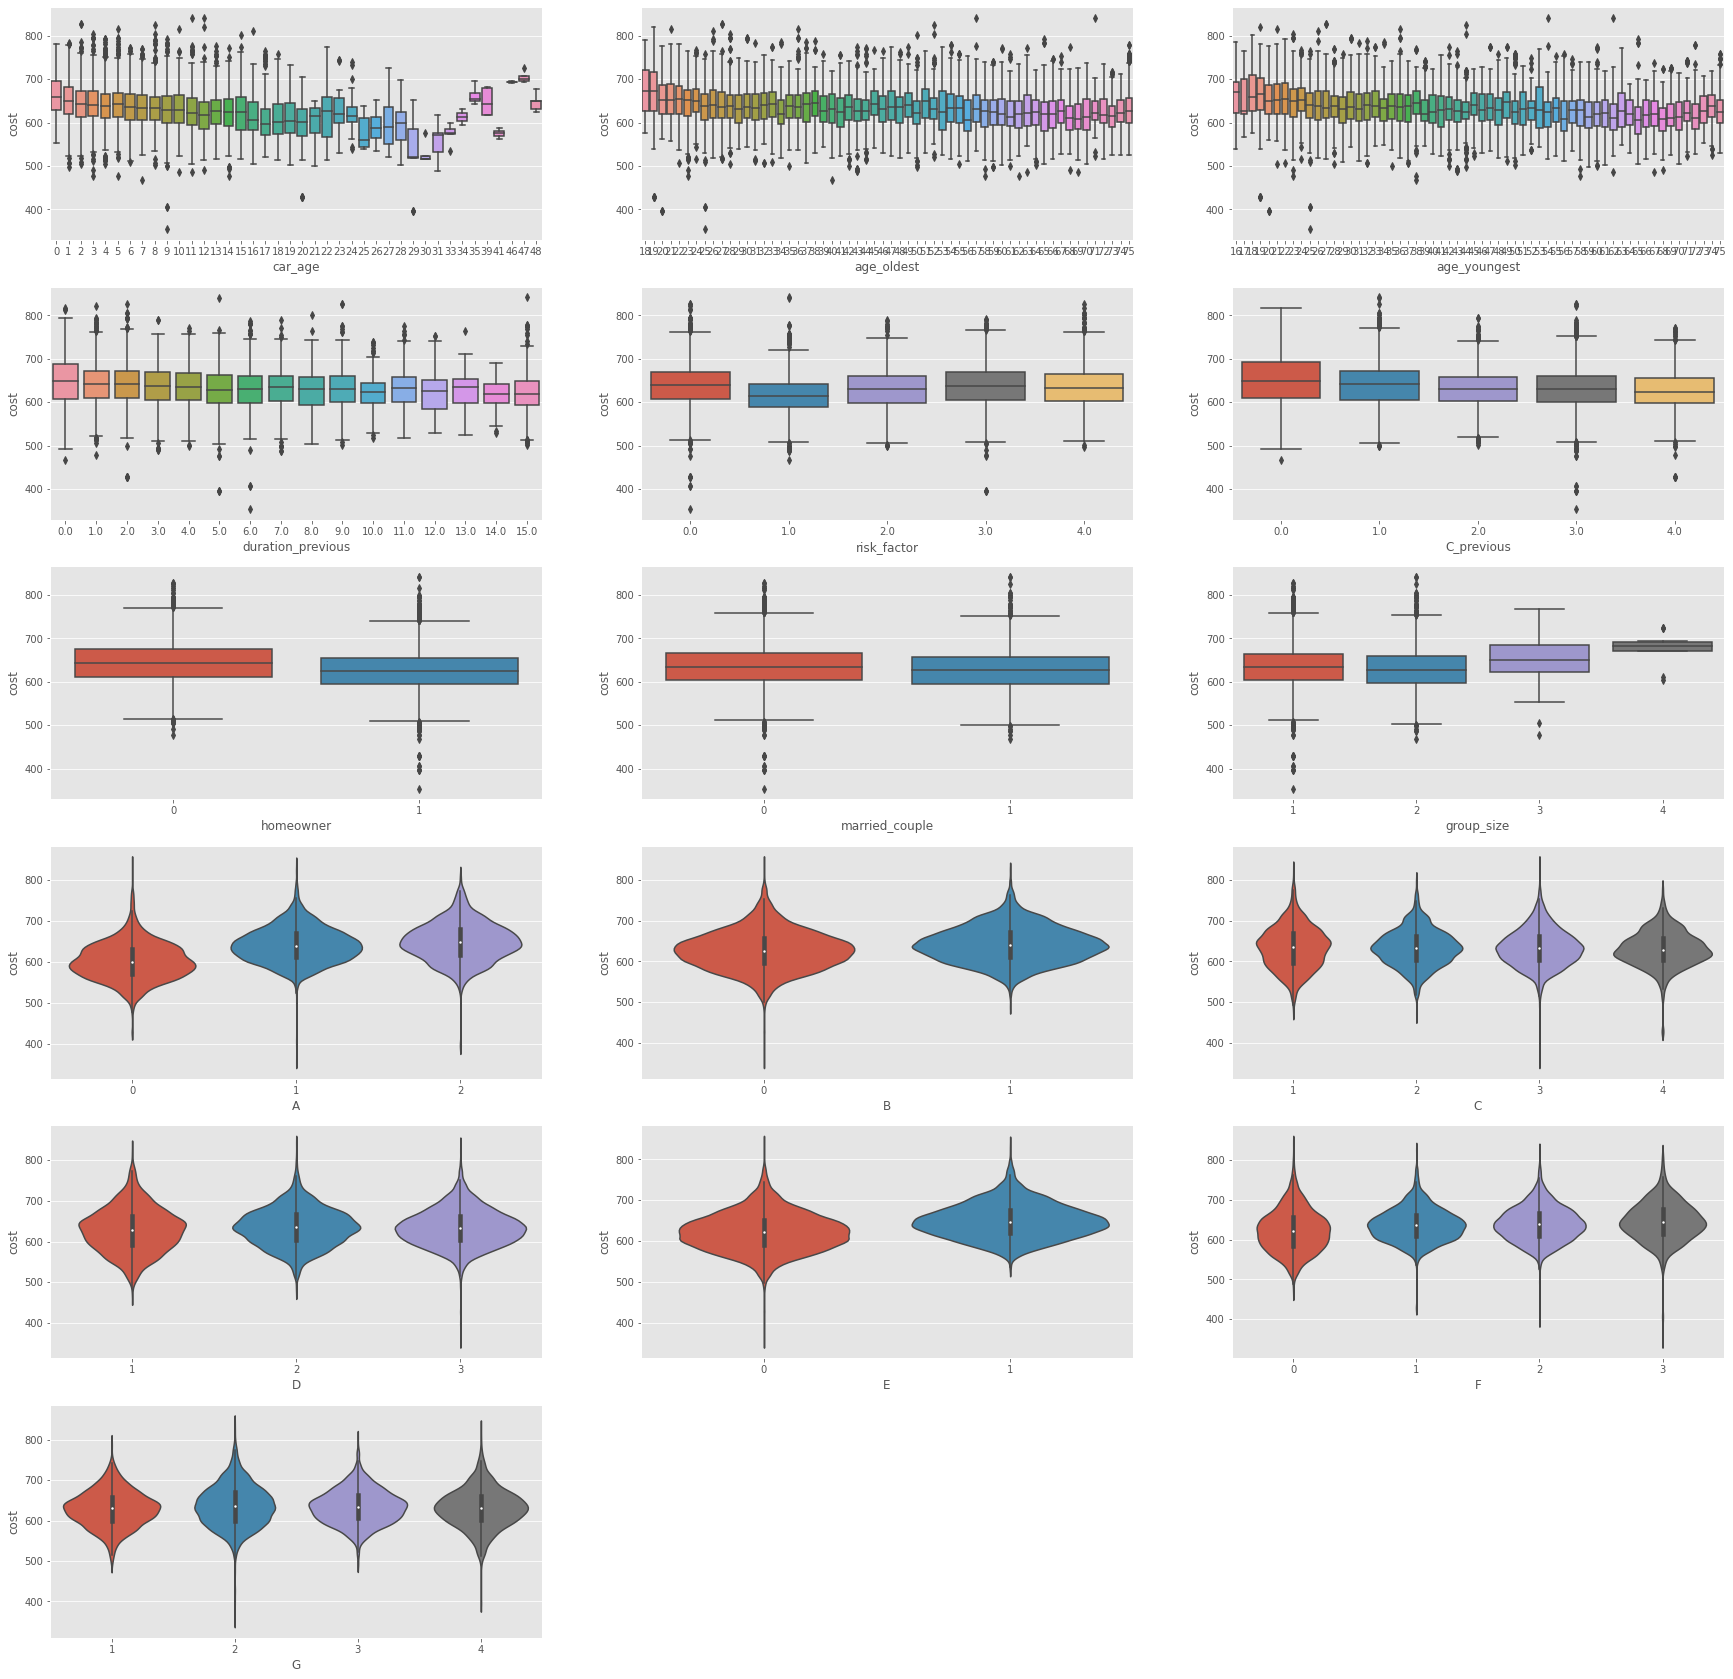

In [5]:
varstolook = ["car_age","age_oldest","age_youngest","duration_previous","risk_factor","C_previous","homeowner","married_couple","group_size","A","B","C","D","E","F","G"]
cat_vars   = ["state","car_value","A","B","C","D","E","F","G"]

plt.figure(figsize=(30,30))
for i,var in enumerate(varstolook):
    plt.subplot(6,3,i+1)
    if var in cat_vars:
        sns.violinplot(x=var,y='cost',data=df)   
    else:
        sns.boxplot(x=var,y='cost',data=df)

-------

### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

**Answer.**

In [6]:
for var in cat_vars:
    df = pd.concat([df,pd.get_dummies(df[var],prefix=var,drop_first=True)],axis=1)
df.head(5)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost,state_AR,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_IA,state_ID,state_IN,state_KS,state_KY,state_MD,state_ME,state_MO,state_MS,state_MT,state_ND,state_NE,state_NH,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SD,state_TN,state_UT,state_WA,state_WI,state_WV,state_WY,car_value_b,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i,A_1,A_2,B_1,C_2,C_3,C_4,D_2,D_3,E_1,F_1,F_2,F_3,G_2,G_3,G_4
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


-------

## Fitting a multiple linear regression

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

**Answer.**

In [7]:
np.random.seed(1337)
ndata     = len(df)

# Randomly choose 0.8n indices between 1 and n
idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = df.iloc[idx_train] # the training data set
test      = df.iloc[idx_test]  # the test data set
print(train.shape) # 12,386 rows and 90 columns
print(test.shape)  #  3,097 rows and 90 columns

(12386, 78)
(3097, 78)


-------

### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

**Answer.**

In [8]:
model_all = smf.ols(formula="cost ~ state + group_size + homeowner + car_age + car_value + risk_factor + age_oldest + age_youngest + married_couple + C_previous + duration_previous + A + B + C + D + E + F + G",data=train).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     143.0
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:17   Log-Likelihood:                -61546.
No. Observations:               12344   AIC:                         1.232e+05
Df Residuals:                   12276   BIC:                         1.237e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           683.8289      8.594     79.566      0.000     666.982     700.675
state[T.AR]           0.4072      3.106      0.131      0.896      -5.682       6.496
state[T.CO]         -10.9356      2.572     -4.252      0.000     -15.977      -5.894
state[T.CT]          28.5326      2.868      9.948      0.000      22.911      34.155
state[T.DC]          35.6920      4.593      7.772      0.000      26.690      44.694
state[T.DE]          33.3884      4.455      7.495      0.000      24.656      42.120
state[T.FL]          11.2874      2.162      5.222      0.000       7.050      15.525
state[T.GA]           6.6917      2.381      2.811      0.005       2.025      11.358
state[T.IA]         -50.9502      3.529    -14.439      0.000     -57.867     -44.034
state[T.ID]         -21.3817      4.126     -5.183      0.000     -29.469     -13.295
state[T.IN]         -11.6240      2.573     -4.518      0.000     -16.667      -6.581
state[T.KS]          -9.2766      4.385     -2.116      0.034     -17.871      -0.682
state[T.KY]          19.9873      2.925      6.833      0.000      14.254      25.721
state[T.MD]          21.4571      2.467      8.697      0.000      16.621      26.293
state[T.ME]         -36.2676      3.947     -9.189      0.000     -44.004     -28.531
state[T.MO]         -22.9082      2.975     -7.701      0.000     -28.739     -17.077
state[T.MS]          -0.9339      3.280     -0.285      0.776      -7.364       5.496
state[T.MT]         -13.4074      6.163     -2.175      0.030     -25.488      -1.327
state[T.ND]           3.1635      6.064      0.522      0.602      -8.724      15.051
state[T.NE]         -14.4920      5.632     -2.573      0.010     -25.531      -3.453
state[T.NH]         -21.4775      3.776     -5.688      0.000     -28.879     -14.076
state[T.NM]          -1.7314      3.792     -0.457      0.648      -9.164       5.701
state[T.NV]          21.1240      2.804      7.535      0.000      15.629      26.619
state[T.NY]          38.0610      2.406     15.821      0.000      33.346      42.777
state[T.OH]          -8.9122      2.309     -3.859      0.000     -13.439      -4.385
state[T.OK]         -12.2284      2.738     -4.467      0.000     -17.595      -6.862
state[T.OR]         -11.2545      2.843     -3.959      0.000     -16.827      -5.682
state[T.PA]           9.7410      2.214      4.400      0.000       5.402      14.080
state[T.RI]          25.2915      4.204      6.016      0.000      17.051      33.532
state[T.SD]         -13.6322     12.711     -1.072      0.284     -38.548      11.284
state[T.TN]         -12.0365      2.617     -4.599      0.000     -17.167      -6.906
state[T.UT]         -17.0342      2.858     -5.961      0.000     -22.636     -11.433
state[T.WA]           2.8072      2.589      1.084      0.278      -2.267

In [9]:
model_all.aic

123227.15166098613

-------

#### 4.2 

According to `model_all`, which states are most and least expensive?

**Answer.**

Since the variable `state` is a categorical value, we'll always have to bear in mind that there is a reference or baseline category from which we can compare. In this particular case, the baseline state is Alabama, so we should say that, once we control for all other factors -such as `homeowner`, `car_age` and `married_couple` among others-, the cost of an insurance is greater in the state of New York (NY) and lesser in the state of Iowa (IA), compared to Alabama (AL).

-------

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer.**

- `group_size`: Once we control for other factors, we could say that, on average, there's an increase in the cost of the insurance of approximately 3 dollars for each new member in the insurance. Both sign an coefficient makes sense to me, and the variable is also statistically significant.
- `homeowner`: Once we control for other factors, we could say that, on average, there's a decrease in the cost of the insurance of approximately 14 dollars if the person that acquires the insurance owns a home. Both sign an coefficient makes sense to me, and the variable is also statistically significant.
- `car_age`: Once we control for other factors, we could say that, on average, there's a decrease in the cost of the insurance of approximately 70 cents for each year that a car being insured is older (*i.e* older cars are going to be charged a lower fee). I'm not sure about the coefficient value, but at least compared to the Colombian case it doesn't make any sense that older cars pay less than new ones. Because of this, the sign of the variable is not what I would expect. Furthermore, the plots analyzed before give support to this claim, but we would need to consider a **non-linearity** to capture the true effect of `car_age` on `cost`.
- `risk_factor`: Once we control for other factors, we could say that, on average, there's a decrease in the cost of the insurance of approximately 33 cents once the person acquiring the insurance is more risky. Both sign and coefficient do not make any sense, and this could be supported by analyzing the p-value. I think that the error comes from the fact that this is a variable that should be classified as categorical, and it is being used as a numerical variable only. 
- `age_oldest`: Once we control for other factors, we could say that, on average, there's an increase in the cost of the insurance of approximately 60 cents for each new member in the group insured that is older than the others. Both sign and coefficient makes sense, based on the plots analyzed before. The variable is also statistically significant.
- `age_youngest`: Once we control for other factors, we could say that, on average, there's a decrease in the cost of the insurance of approximately 1 dollar for each new member in the group insured that is younger than the others. Both sign and coefficient makes sense, based on the plots analyzed before. The variable is also statistically significant.
- `married_couple`: Once we control for other factors, we could say that, on average, there's a decrease in the cost of the insurance of approximately 9,6 dollars if the person acquiring the insurance is married. The sign makes sense to me since we could think that married people are more prone to be careful, but what surprises me is the coefficient. Compared to the other variables, this is one that exhibits a big value. The variable is also statistically significant.
- `duration_previous`: Once we control for other factors, we could say that, on average, there's a decrease in the cost of the insurance of approximately 1,5 dollars for each year that a new client has been covered with a previous insurance. Both sign and coefficient makes sense, since each additional year of insurance represents a more responsible person. The variable is also statistically significant.

-------

### Exercise 5:

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

**Answer.**

Since there is no clear direction on which $p-level$ we should assume statistically significance, I'll assume it is at a 5% level. Having said this, the variables that are **not** statistically significant at that level would be `B`, `C`, `D` and `risk_factor`. The results for the new model would be: 

In [10]:
model_sig = smf.ols(formula="cost ~ state + group_size + homeowner + car_age + car_value + age_oldest + age_youngest + married_couple + C_previous + duration_previous + A + E + F + G",data=train).fit()
model_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     159.5
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:30   Log-Likelihood:                -61550.
No. Observations:               12344   AIC:                         1.232e+05
Df Residuals:                   12283   BIC:                         1.237e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           683.7532      8.569     79.793      0.000     666.956     700.550
state[T.AR]           0.2411      3.088      0.078      0.938      -5.812       6.295
state[T.CO]         -11.2359      2.551     -4.405      0.000     -16.236      -6.236
state[T.CT]          27.6623      2.823      9.801      0.000      22.130      33.195
state[T.DC]          35.5594      4.586      7.754      0.000      26.570      44.549
state[T.DE]          32.1718      4.419      7.281      0.000      23.510      40.833
state[T.FL]          10.3231      2.126      4.856      0.000       6.157      14.490
state[T.GA]           6.5567      2.347      2.794      0.005       1.957      11.157
state[T.IA]         -51.2824      3.499    -14.658      0.000     -58.140     -44.425
state[T.ID]         -21.6288      4.106     -5.267      0.000     -29.678     -13.580
state[T.IN]         -12.4824      2.512     -4.969      0.000     -17.407      -7.558
state[T.KS]          -9.8189      4.369     -2.247      0.025     -18.383      -1.255
state[T.KY]          19.3006      2.907      6.640      0.000      13.603      24.998
state[T.MD]          20.6077      2.427      8.492      0.000      15.851      25.365
state[T.ME]         -37.1284      3.906     -9.506      0.000     -44.784     -29.472
state[T.MO]         -23.3079      2.960     -7.874      0.000     -29.110     -17.506
state[T.MS]          -1.2728      3.264     -0.390      0.697      -7.671       5.125
state[T.MT]         -13.6329      6.153     -2.216      0.027     -25.693      -1.573
state[T.ND]           2.6334      6.018      0.438      0.662      -9.164      14.431
state[T.NE]         -15.1524      5.620     -2.696      0.007     -26.168      -4.137
state[T.NH]         -22.3175      3.744     -5.962      0.000     -29.655     -14.980
state[T.NM]          -2.2353      3.772     -0.593      0.553      -9.629       5.158
state[T.NV]          20.5030      2.785      7.362      0.000      15.044      25.962
state[T.NY]          37.4942      2.365     15.851      0.000      32.858      42.131
state[T.OH]          -9.4245      2.284     -4.127      0.000     -13.901      -4.948
state[T.OK]         -12.9513      2.718     -4.764      0.000     -18.280      -7.623
state[T.OR]         -11.6214      2.833     -4.102      0.000     -17.174      -6.069
state[T.PA]           8.9963      2.186      4.115      0.000       4.711      13.281
state[T.RI]          24.5672      4.189      5.865      0.000      16.357      32.778
state[T.SD]         -13.7262     12.702     -1.081      0.280     -38.625      11.173
state[T.TN]         -12.2444      2.613     -4.686      0.000     -17.366      -7.123
state[T.UT]         -17.3061      2.851     -6.070      0.000     -22.894     -11.718
state[T.WA]           2.3803      2.578      0.923      0.356      -2.672

In [11]:
model_sig.aic

123221.37264531304

As we could see, there is no evident gain in this model since the $R^2$ is the same, but using the rule of thumb for the AIC criterion we could say that we have improved our model a little bit.

-------

### Exercise 6:

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

**Answer.**

In [12]:
model_sig_plus = smf.ols(formula="cost ~ state + group_size + homeowner + car_age + I(car_age**2) + car_value + age_oldest + age_youngest + I(age_youngest**2) + car_value*age_youngest + married_couple + C_previous + duration_previous + A + E + F + G",data=train).fit()
model_sig_plus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     145.1
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:46   Log-Likelihood:                -61385.
No. Observations:               12344   AIC:                         1.229e+05
Df Residuals:                   12273   BIC:                         1.234e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     703.9073     22.266     31.614      0.000     660.263     747.551
state[T.AR]                     0.3712      3.058      0.121      0.903      -5.624       6.366
state[T.CO]                    -9.8740      2.526     -3.909      0.000     -14.825      -4.923
state[T.CT]                    29.4814      2.797     10.542      0.000      24.000      34.963
state[T.DC]                    38.3384      4.540      8.445      0.000      29.440      47.237
state[T.DE]                    31.7822      4.388      7.242      0.000      23.180      40.384
state[T.FL]                     9.3865      2.107      4.454      0.000       5.256      13.517
state[T.GA]                     7.1371      2.325      3.069      0.002       2.579      11.695
state[T.IA]                   -50.2192      3.460    -14.515      0.000     -57.001     -43.437
state[T.ID]                   -21.5599      4.060     -5.310      0.000     -29.518     -13.602
state[T.IN]                   -12.2742      2.489     -4.932      0.000     -17.153      -7.396
state[T.KS]                   -10.1074      4.318     -2.341      0.019     -18.570      -1.644
state[T.KY]                    20.4693      2.878      7.112      0.000      14.828      26.111
state[T.MD]                    21.8429      2.407      9.074      0.000      17.125      26.561
state[T.ME]                   -35.4476      3.868     -9.165      0.000     -43.029     -27.866
state[T.MO]                   -24.1602      2.930     -8.246      0.000     -29.903     -18.417
state[T.MS]                    -0.7863      3.235     -0.243      0.808      -7.127       5.554
state[T.MT]                   -15.2115      6.078     -2.503      0.012     -27.125      -3.298
state[T.ND]                     2.5995      5.960      0.436      0.663      -9.084      14.283
state[T.NE]                   -15.9394      5.553     -2.870      0.004     -26.824      -5.055
state[T.NH]                   -22.3565      3.711     -6.025      0.000     -29.630     -15.083
state[T.NM]                    -3.2193      3.743     -0.860      0.390     -10.556       4.117
state[T.NV]                    21.4818      2.758      7.789      0.000      16.076      26.887
state[T.NY]                    38.7097      2.346     16.501      0.000      34.111      43.308
state[T.OH]                    -9.4818      2.260     -4.195      0.000     -13.913      -5.051
state[T.OK]                   -13.9038      2.693     -5.163      0.000     -19.183      -8.625
state[T.OR]                   -11.5514      2.802     -4.122      0.000     -17.045      -6.058
state[T.PA]                     9.7667      2.167      4.506      0.000       5.518      14.015
state[T.RI]                    22.7337      4.143      5.487      0.000      14.612      30.855
state[T.SD]

In [13]:
model_sig_plus.aic

122911.57564864049

-------

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [14]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer.**

In [15]:
train = train.merge(state_regions[['State Code','Region']] ,how='left',left_on='state',right_on='State Code')

In [16]:
train["region"] = train["Region"].astype("category")
type(train["region"])

pandas.core.series.Series

-------

#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

**Answer.**

In [17]:
model_region = smf.ols(formula="cost ~ region + group_size + homeowner + car_age + I(car_age**2) + car_value + age_oldest + age_youngest + I(age_youngest**2) + car_value*age_youngest + married_couple + C_previous + duration_previous + A + E + F + G",data=train).fit()
model_region.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     198.2
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:51   Log-Likelihood:                -62159.
No. Observations:               12344   AIC:                         1.244e+05
Df Residuals:                   12305   BIC:                         1.247e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     703.7767     23.418     30.052      0.000     657.873     749.681
region[T.Northeast]            32.4951      1.227     26.486      0.000      30.090      34.900
region[T.South]                23.6082      1.014     23.291      0.000      21.621      25.595
region[T.West]                 13.4782      1.192     11.311      0.000      11.143      15.814
car_value[T.b]                -85.7135     28.987     -2.957      0.003    -142.533     -28.894
car_value[T.c]                -41.1899     23.544     -1.749      0.080     -87.340       4.961
car_value[T.d]                -51.7700     23.391     -2.213      0.027     -97.621      -5.919
car_value[T.e]                -43.4182     23.348     -1.860      0.063     -89.183       2.347
car_value[T.f]                -41.4374     23.369     -1.773      0.076     -87.245       4.370
car_value[T.g]                -33.3515     23.464     -1.421      0.155     -79.344      12.641
car_value[T.h]                -16.8924     23.929     -0.706      0.480     -63.796      30.012
car_value[T.i]                 29.0181     28.929      1.003      0.316     -27.687      85.723
A[T.1]                         40.1784      1.376     29.203      0.000      37.482      42.875
A[T.2]                         44.9859      1.731     25.994      0.000      41.594      48.378
E[T.1]                         11.9659      0.791     15.132      0.000      10.416      13.516
F[T.1]                         -3.9262      1.313     -2.989      0.003      -6.501      -1.352
F[T.2]                         -3.4480      1.279     -2.697      0.007      -5.954      -0.942
F[T.3]                         -7.5404      2.195     -3.436      0.001     -11.842      -3.239
G[T.2]                         11.1127      0.930     11.948      0.000       9.290      12.936
G[T.3]                          7.4616      1.052      7.091      0.000       5.399       9.524
G[T.4]                          8.1477      1.255      6.494      0.000       5.689      10.607
group_size                      0.4456      1.555      0.287      0.774      -2.602       3.493
homeowner                     -14.7405      0.758    -19.452      0.000     -16.226     -13.255
car_age                        -1.4270      0.164     -8.687      0.000      -1.749      -1.105
I(car_age ** 2)                 0.0369      0.007      4.960      0.000       0.022       0.051
age_oldest                      0.5880      0.067      8.764      0.000       0.457       0.720
age_youngest                   -3.0790      0.420     -7.337      0.000      -3.902      -2.256
car_value[T.b]:age_youngest     0.7226      0.557      1.296      0.195      -0.370       1.815
car_value[T.c]:age_youngest     0.2322      0.413      0.563      0.574      -0.576       1.041
car_value[T

-------

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer.**

Similar to the approach with `State` variable, I would create some buckets related to the value of the car to inspect if there could be a gain in the model. Additionally, I would eliminate those variables that are not statistical significant. For example, the interaction between `car_value` and `age_youngest` is not very useful. Finally, as seen in the plots from the beginning, there could be a potential presence of multicollinearity between variables, so we could inspect the correlations between the numerical variables to analyze if there is room to improve the model by eliminating certain features.

-------

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

**Answer.**

In [18]:
num_vars = ['group_size','homeowner','car_age','age_oldest','age_youngest','married_couple','C_previous','duration_previous']
train[num_vars].corr()

,group_size,homeowner,car_age,age_oldest,age_youngest,married_couple,C_previous,duration_previous
group_size,1.000000,0.192858,-0.035703,0.211755,-0.028641,0.776404,0.074540,0.077419
homeowner,0.192858,1.000000,-0.046454,0.410627,0.358290,0.192465,0.135556,0.179676
car_age,-0.035703,-0.046454,1.000000,-0.023136,-0.023665,-0.041761,-0.123740,-0.057859
age_oldest,0.211755,0.410627,-0.023136,1.000000,0.917184,0.202122,0.130631,0.270057
age_youngest,-0.028641,0.358290,-0.023665,0.917184,1.000000,0.099764,0.122991,0.246696
married_couple,0.776404,0.192465,-0.041761,0.202122,0.099764,1.000000,0.061613,0.067963
C_previous,0.074540,0.135556,-0.123740,0.130631,0.122991,0.061613,1.000000,0.254975
duration_previous,0.077419,0.179676,-0.057859,0.270057,0.246696,0.067963,0.254975,1.000000


We can clearly see that there is a high correlation between `age_oldest` and `age_youngest`, with a coefficient of nearly 92%. This is something that makes a lot of sense given that the plots that we've seen at the beginning let us see that the two variables were very similar.

There is also another high correlation between `group_size` and `married_couple` (nearly 78%). However, even though the number is quite large, the fact that both variables have different coefficients and especially different signs in the regression model, is a hint to **don't** drop any of these variables.  

-------

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

**Answer.**

In [19]:
model_region_no_oldest = smf.ols(formula="cost ~ region + group_size + homeowner + car_age + I(car_age**2) + car_value + age_youngest + I(age_youngest**2) + car_value*age_youngest + married_couple + C_previous + duration_previous + A + E + F + G",data=train).fit()
model_region_no_oldest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     200.3
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:09:55   Log-Likelihood:                -62197.
No. Observations:               12344   AIC:                         1.245e+05
Df Residuals:                   12306   BIC:                         1.248e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     698.4870     23.483     29.745      0.000     652.457     744.517
region[T.Northeast]            32.7213      1.230     26.594      0.000      30.310      35.133
region[T.South]                23.6398      1.017     23.251      0.000      21.647      25.633
region[T.West]                 13.5464      1.195     11.334      0.000      11.204      15.889
car_value[T.b]                -86.4409     29.076     -2.973      0.003    -143.435     -29.447
car_value[T.c]                -41.1415     23.617     -1.742      0.082     -87.434       5.151
car_value[T.d]                -50.7484     23.463     -2.163      0.031     -96.740      -4.757
car_value[T.e]                -42.6998     23.419     -1.823      0.068     -88.606       3.206
car_value[T.f]                -40.7014     23.441     -1.736      0.083     -86.649       5.247
car_value[T.g]                -32.5914     23.536     -1.385      0.166     -78.725      13.543
car_value[T.h]                -16.4002     24.002     -0.683      0.494     -63.448      30.648
car_value[T.i]                 25.8152     29.016      0.890      0.374     -31.060      82.690
A[T.1]                         40.2687      1.380     29.180      0.000      37.564      42.974
A[T.2]                         45.1833      1.736     26.030      0.000      41.781      48.586
E[T.1]                         12.1162      0.793     15.279      0.000      10.562      13.671
F[T.1]                         -4.2470      1.317     -3.225      0.001      -6.828      -1.666
F[T.2]                         -3.6485      1.282     -2.845      0.004      -6.162      -1.135
F[T.3]                         -7.8571      2.201     -3.570      0.000     -12.171      -3.543
G[T.2]                         11.3172      0.933     12.135      0.000       9.489      13.145
G[T.3]                          7.3984      1.055      7.010      0.000       5.330       9.467
G[T.4]                          8.1915      1.258      6.509      0.000       5.725      10.658
group_size                      8.8965      1.223      7.272      0.000       6.498      11.295
homeowner                     -13.8517      0.753    -18.388      0.000     -15.328     -12.375
car_age                        -1.3952      0.165     -8.470      0.000      -1.718      -1.072
I(car_age ** 2)                 0.0358      0.007      4.795      0.000       0.021       0.050
age_youngest                   -2.6263      0.418     -6.287      0.000      -3.445      -1.808
car_value[T.b]:age_youngest     0.7198      0.559      1.287      0.198      -0.376       1.816
car_value[T.c]:age_youngest     0.2326      0.414      0.562      0.574      -0.579       1.044
car_value[T.d]:age_youngest     0.5563      0.402      1.383      0.167      -0.232       1.345
car_value[T

-------

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

**Answer.**

As seen on the lectures, one useful way to analyze the fit of a model is by looking at its **residuals**. What we understand as residuals is nothing more that the difference between the current observations of our response variable (`cost`) and its corresponding fitted values. From a visually perspective this residuals correspond to the distance between the fitted line and the data points.

The crucial assumption is that residuals should exhibit a normal distribution. In this sense, by plotting a histogram of the residuals we could get a sense on how good is the performance of our model:

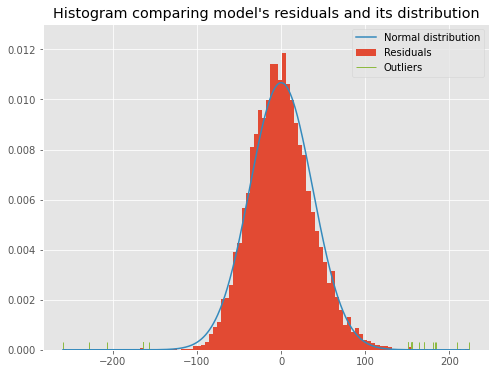

In [20]:
#Plot parameters:
plt.figure(figsize=(8,6))

#Plot of residuals:
plt.hist(model_region_no_oldest.resid,density=True,bins=100,label="Residuals")

#Plot of a density function of a normal distribution to compare the results:
xx = np.linspace(model_region_no_oldest.resid.min(),model_region_no_oldest.resid.max(),num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(model_region_no_oldest.scale)),label="Normal distribution")

#Identify outliers (those that are more than four standard deviations away from zero):
outliers = np.abs(model_region_no_oldest.resid)>4*np.sqrt(model_region_no_oldest.scale)
sns.rugplot(model_region_no_oldest.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="Outliers")
plt.legend(loc="upper right")
plt.title("Histogram comparing model's residuals and its distribution");

As we can see from the previous plot, although the model doesn't have a lot of outliers, it exhibits long tails, especially to the left of the distribution. This translates in a lot of observations that have a `cost` significantly lower than the fit provided by the model. Other interesting thing is that the peak of the residuals is higher than the normal distribution.

Another useful plot to visualize the normality assumption is a QQ-plot of the residuals, which shows nonlinearity and is another strong warning sign:

/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


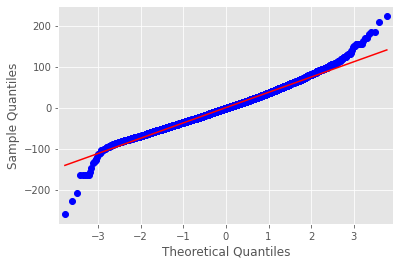

In [21]:
sm.qqplot(model_region_no_oldest.resid, line="s");

-------

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

**Answer.**

In [22]:
scipy.stats.boxcox(train['cost'])[1]

0.4952331536657678

According to the boxcox transformation, the lamdba is approximately a 0.5, which corresponds to a square root transformation.

-------

#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

**Answer.**

In [23]:
model_region_no_oldest_box_cox = smf.ols(formula="I(cost**(1/2)) ~ region + group_size + homeowner + car_age + I(car_age**2) + car_value + age_youngest + I(age_youngest**2) + car_value*age_youngest + married_couple + C_previous + duration_previous + A + E + F + G",data=train).fit()
model_region_no_oldest_box_cox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     I(cost ** (1 / 2))   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:10:02   Log-Likelihood:                -13801.
No. Observations:               12344   AIC:                         2.768e+04
Df Residuals:                   12306   BIC:                         2.796e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      26.4730      0.466     56.854      0.000      25.560      27.386
region[T.Northeast]             0.6541      0.024     26.812      0.000       0.606       0.702
region[T.South]                 0.4746      0.020     23.541      0.000       0.435       0.514
region[T.West]                  0.2744      0.024     11.578      0.000       0.228       0.321
car_value[T.b]                 -1.8227      0.577     -3.161      0.002      -2.953      -0.693
car_value[T.c]                 -0.8634      0.468     -1.844      0.065      -1.781       0.055
car_value[T.d]                 -1.0591      0.465     -2.276      0.023      -1.971      -0.147
car_value[T.e]                 -0.9030      0.464     -1.944      0.052      -1.813       0.007
car_value[T.f]                 -0.8642      0.465     -1.859      0.063      -1.775       0.047
car_value[T.g]                 -0.7060      0.467     -1.513      0.130      -1.621       0.209
car_value[T.h]                 -0.3864      0.476     -0.812      0.417      -1.319       0.547
car_value[T.i]                  0.3942      0.575      0.685      0.493      -0.734       1.522
A[T.1]                          0.8070      0.027     29.492      0.000       0.753       0.861
A[T.2]                          0.9025      0.034     26.220      0.000       0.835       0.970
E[T.1]                          0.2396      0.016     15.241      0.000       0.209       0.270
F[T.1]                         -0.0800      0.026     -3.063      0.002      -0.131      -0.029
F[T.2]                         -0.0688      0.025     -2.705      0.007      -0.119      -0.019
F[T.3]                         -0.1542      0.044     -3.534      0.000      -0.240      -0.069
G[T.2]                          0.2208      0.018     11.942      0.000       0.185       0.257
G[T.3]                          0.1472      0.021      7.036      0.000       0.106       0.188
G[T.4]                          0.1608      0.025      6.443      0.000       0.112       0.210
group_size                      0.1746      0.024      7.197      0.000       0.127       0.222
homeowner                      -0.2754      0.015    -18.435      0.000      -0.305      -0.246
car_age                        -0.0269      0.003     -8.226      0.000      -0.033      -0.020
I(car_age ** 2)                 0.0007      0.000      4.523      0.000       0.000       0.001
age_youngest                   -0.0519      0.008     -6.269      0.000      -0.068      -0.036
car_value[T.b]:age_youngest     0.0152      0.011      1.373      0.170      -0.007       0.037
car_value[T.c]:age_youngest     0.0048      0.008      0.589      0.556      -0.011       0.021
car_value[T.d]:age_youngest     0.0113      0.008      1.421      0.155      -0.004       0.027
car_value[T

From the model above we can see that there is a major improvement once we analyze the AIC criteria. In the final model we see that this number is 27,677.7 whilst in `model_region_no_oldest` it was 124,469.9. There is still room for improvement, as the independent variables account for 38% of the total variability of `cost`, but it is a good start.

-------

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 